# Environment setup & graphical parameters

In [9]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
import os
import urllib

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
                                  
# Graphical set up

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

sns.set()
sns.set_style("ticks")
ColorsPalette = sns.color_palette("tab10")

# Import data

In [24]:
'''# Define a working directory
import os
from urllib.request import urlretrieve
from zipfile import ZipFile
#from os import chdir, getcwd
wd=os.getcwd()
os.chdir(wd + '/data')

# Retrieve data from web (uncomment if needed) #

urlretrieve('https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip')

# Unzip file in current folder (uncomment if needed) #

unZip = ZipFile('fr.openfoodfacts.org.products.csv.zip', 'r')
unZip.extractall()

'''

In [37]:
# Read the data
path = '/Users/franck/Documents/P3_Concevez_application_sante_publique/'
df_origin = pd.read_csv(path + 'data/fr.openfoodfacts.org.products.csv', sep = '\t', encoding = 'UTF-8', decimal = ".", low_memory=False)


In [38]:
# Copy the original table to avoid charging it
df = df_origin.copy()

Summary of the full dataset

In [39]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


## 1. Missing values

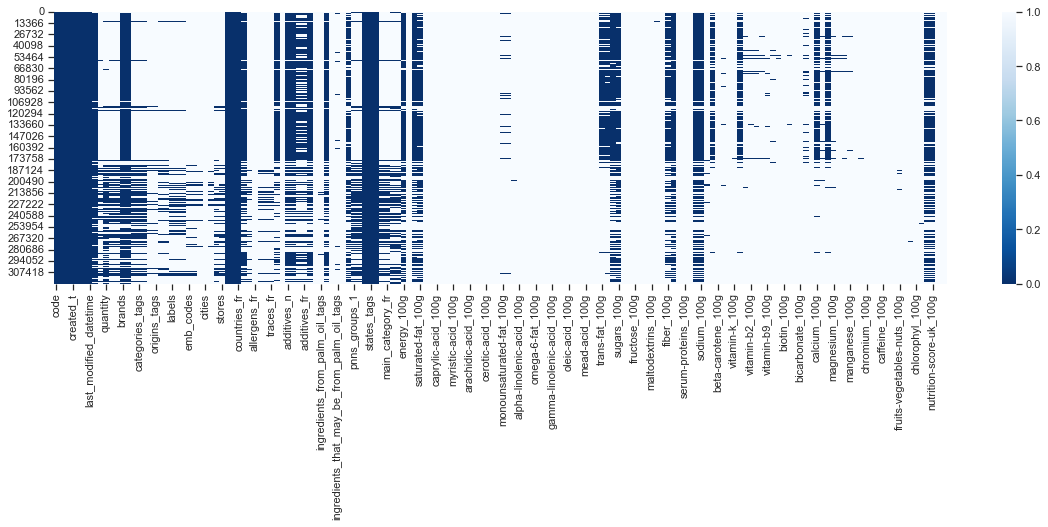

In [43]:
figure = plt.figure(figsize = (20,5))
sns.heatmap(df.isna(), cmap = "Blues_r")
plt.savefig(path + 'visualisation/NaN_heatmap_fulldata.png', bbox_inches="tight")

In [44]:
# Calculated the percentage of missing values per columns
NaN_col = df.isnull().mean() * 100
NaN_col.describe()

count    162.000000
mean      76.221573
std       34.560501
min        0.000000
25%       56.437906
50%       97.967871
75%       99.991427
max      100.000000
dtype: float64

In [45]:
# Drop colomns with more than 75% of missing values
col_drop = df.loc[:, df.isnull().mean() > .75].columns
df1 = df.drop(col_drop, axis=1)

df1.isnull().mean() * 100

code                                        0.007170
url                                         0.007170
creator                                     0.000623
created_t                                   0.000935
created_datetime                            0.002806
last_modified_t                             0.000000
last_modified_datetime                      0.000000
product_name                                5.537266
quantity                                   67.322896
brands                                      8.857382
brands_tags                                 8.859876
categories                                 73.685359
categories_tags                            73.691906
categories_fr                              73.685047
countries                                   0.087289
countries_tags                              0.087289
countries_fr                                0.087289
ingredients_text                           22.386617
serving_size                               34.

In [46]:
# Keep only french references as the apps is for Santé publique France
stringlist = ["FR", "fr", "Fr"]
df1 = df1[df1['countries'].str.contains("|".join(stringlist)) == True]

df1.to_csv(path + 'data/OFF_french.csv')

In [47]:
# Drop unnecessary columns -> column with _tags, _en, or _t, url ... or repeated information
to_drop = ['url',
           'created_t',
           'last_modified_t',
           'brands_tags',
           'categories_tags',
           'categories_en',
           'ingredients_text',
           'countries_tags',
           'countries_en',
           'states_tags',
           'states_en',
           'main_category',
           'main_category_en',
           'image_url',
           'image_small_url',
           'image_ingredients_url',
           'image_ingredients_small_url',
           'image_nutrition_url',
           'image_nutrition_small_url',
           'states',
           'energy_100g',
           'sodium_100g',
           'nutrition-score-fr_100g'
          ]

df1.drop(to_drop, inplace=True, axis=1)

df1.to_csv(path + 'data/OFF_necessary_col.csv')

KeyError: "['categories_en', 'countries_en', 'states_en', 'main_category_en', 'image_url', 'image_small_url', 'image_ingredients_url', 'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url'] not found in axis"

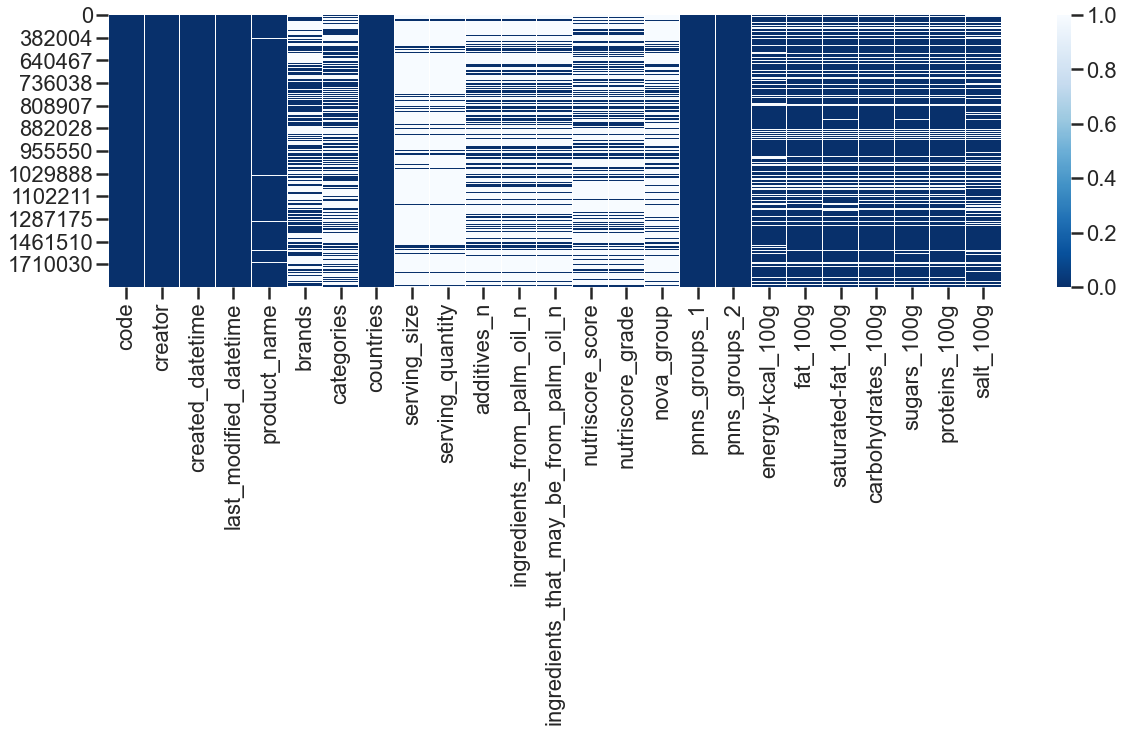

In [ ]:
# Vizualised dataset missing values

figure = plt.figure(figsize = (20,5))
sns.set_context('poster', font_scale = 1)
sns.heatmap(df1.isna(), cmap = "Blues_r")
plt.savefig(path + 'visualisation/NaN_heatmap_reducdeDF.png', bbox_inches="tight")

## 2. Types modification

In [49]:
# makes sure variables are encoded in the good type
# Variables types
df2 = df1.copy()
print('Data dtype counts :\n', df2.dtypes.value_counts(), '\n')

df2.info()

Data dtype counts :
 object     30
float64    20
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98468 entries, 0 to 320770
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     98468 non-null  object 
 1   url                                      98468 non-null  object 
 2   creator                                  98468 non-null  object 
 3   created_t                                98468 non-null  object 
 4   created_datetime                         98467 non-null  object 
 5   last_modified_t                          98468 non-null  object 
 6   last_modified_datetime                   98468 non-null  object 
 7   product_name                             91286 non-null  object 
 8   quantity                                 71266 non-null  object 
 9   brands                                   86456 non-

In [50]:
# Creation of new variable with datetime variables

df2["created_datetime"] = pd.to_datetime(df2["created_datetime"], format="%Y-%m-%d %H:%M:%S.%f", utc=True)
df2['created_years'] = pd.to_datetime(df2['created_datetime'], format='%d:%m:%Y').dt.year

df2["last_modified_datetime"] = pd.to_datetime(df2["last_modified_datetime"], format="%Y-%m-%d %H:%M:%S.%f", utc=True)
df2['last_modified_years'] = pd.to_datetime(df2['last_modified_datetime'], format='%d:%m:%Y').dt.year

# Drop all variables
df2.drop(["created_datetime", "last_modified_datetime"], axis=1, inplace=True)

In [51]:
# Select numeric continous variable columns

df_numeric = df2.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

print('Numeric colums in the dataset are : \n')
print(numeric_cols, '\n')

Numeric colums in the dataset are : 

['additives_n' 'ingredients_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil_n' 'energy_100g' 'fat_100g'
 'saturated-fat_100g' 'trans-fat_100g' 'cholesterol_100g'
 'carbohydrates_100g' 'sugars_100g' 'fiber_100g' 'proteins_100g'
 'salt_100g' 'sodium_100g' 'vitamin-a_100g' 'vitamin-c_100g'
 'calcium_100g' 'iron_100g' 'nutrition-score-fr_100g'
 'nutrition-score-uk_100g' 'created_years' 'last_modified_years'] 



In [52]:
# Some numeric columns are discrete (categorical) so it need to be modify as "object"

numeric_discrete_col = ["additives_n", 
                        "ingredients_from_palm_oil_n", 
                        "ingredients_that_may_be_from_palm_oil_n",
                        "nova_group",
                        "created_years",
                        "last_modified_years"]

# We then modify the types
for col in numeric_discrete_col:
    df2.loc[df2[col].notnull(), [col]] = df2.loc[df2[col].notnull(), [col]].astype("int")
    df2[col] = df2[col].astype("object")

KeyError: 'nova_group'

In [53]:
print(df2.info())
print(df2.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98468 entries, 0 to 320770
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     98468 non-null  object 
 1   url                                      98468 non-null  object 
 2   creator                                  98468 non-null  object 
 3   created_t                                98468 non-null  object 
 4   last_modified_t                          98468 non-null  object 
 5   product_name                             91286 non-null  object 
 6   quantity                                 71266 non-null  object 
 7   brands                                   86456 non-null  object 
 8   brands_tags                              86452 non-null  object 
 9   categories                               61981 non-null  object 
 10  categories_tags                          6198

In [54]:
# Select non numeric columns

df_non_numeric = df2.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

print('Non numeric colums in the dataset are : \n')
print(non_numeric_cols)

Non numeric colums in the dataset are : 

['code' 'url' 'creator' 'created_t' 'last_modified_t' 'product_name'
 'quantity' 'brands' 'brands_tags' 'categories' 'categories_tags'
 'categories_fr' 'countries' 'countries_tags' 'countries_fr'
 'ingredients_text' 'serving_size' 'additives_n' 'additives'
 'additives_tags' 'additives_fr' 'ingredients_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil_n' 'nutrition_grade_fr'
 'pnns_groups_1' 'pnns_groups_2' 'states' 'states_tags' 'states_fr'
 'main_category' 'main_category_fr']


In [25]:
# Formating string variables 

string_cols = ["creator", 
               "product_name", 
               "brands", 
               "countries", 
               "categories",
               "serving_size"]

for col in string_cols:
        df2[col] = df2[col].str.lower()
        df2[col] = df2[col].str.capitalize()

In [55]:
df1['serving_size'].sample(20)

254876                                                  NaN
265614                                                  NaN
187540                                       1 tartine 10 g
196515                                                 25 g
197054                                                  NaN
237176                                               27,5 g
231307                                                  NaN
227729    20 g (Cet emballage contient environ 22 portio...
155761                                                  NaN
236612                                                  NaN
272608                                                  NaN
313841                                       150g (préparé)
250855                                                  NaN
305086                                                  NaN
230373                                                  NaN
197178                                     5 biscuits 72.5g
202902                                  

In [57]:
# Drop Serving size -> to many possibility to automate a cleaning 

df2.drop(['serving_size'], axis = 1, inplace=True)

In [58]:
# Taking care of duplicated values

df2[df2.duplicated()]

,code,url,creator,created_t,last_modified_t,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,countries,countries_tags,countries_fr,ingredients_text,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,created_years,last_modified_years


In [59]:
# Drop duplicated values

df2.drop_duplicates(inplace=True)
df2.shape

(98468, 49)

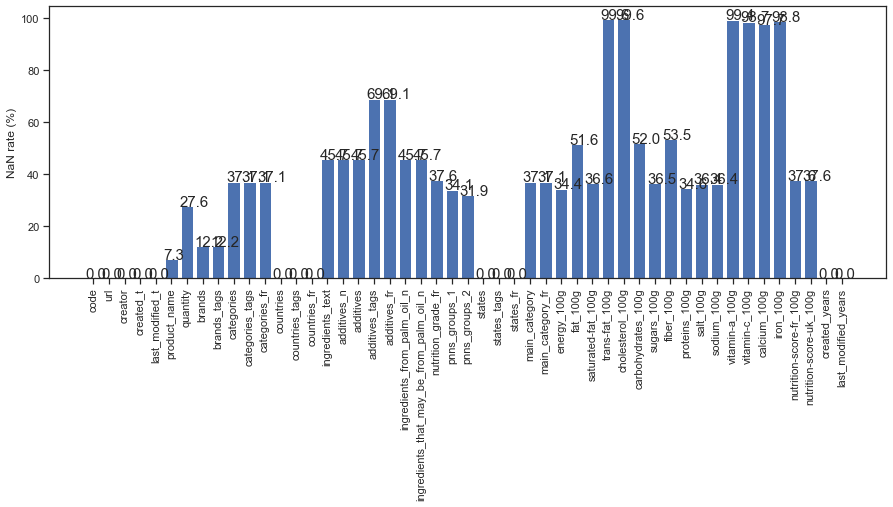

In [61]:
# Shows percentage of missing values per column

NaN_col = df2.isnull().mean() * 100
col = (df2.columns).astype('str')

plt.figure(figsize = (15,5))
plt.bar(x = col, height = NaN_col)
plt.xticks(rotation = 90)
for i, v in enumerate(NaN_col):
    plt.text(i - 0.5, v + 0.1, str(round(v,1)), size = 15)
plt.ylabel('NaN rate (%)')
plt.savefig(path + 'visualisation/NaN_barchart_reducdeDF.png', bbox_inches="tight")

In [62]:
df2.shape

(98468, 49)

## 3. Outliers 

In [63]:
df3 = df2.copy()

### 3.1 Continous column

In [64]:
# Create df only with continous values

df_continous = df3.select_dtypes(include=[np.number])
continous_cols = df_continous.columns.values
round(df_continous.describe(), 2)

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,created_years,last_modified_years
count,64627.00,47677.00,62412.00,390.00,420.00,47245.00,62555.00,45747.00,64354.00,62613.00,62610.00,592.00,1298.00,2262.00,1185.00,61451.00,61451.00,98467.00,98468.00
mean,1171.63,13.34,5.43,0.21,0.04,27.75,13.43,2.56,7.75,1.16,0.46,0.00,0.13,0.32,0.04,8.68,8.36,2015.43,2016.14
std,12832.55,16.94,8.54,0.98,0.53,27.41,19.09,4.63,7.89,4.31,1.70,0.01,2.80,1.74,0.76,9.05,9.38,1.35,0.94
min,0.00,0.00,0.00,0.00,0.00,0.00,-0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-15.00,-15.00,2012.00,2012.00
25%,427.00,1.30,0.30,0.00,0.00,4.00,1.00,0.00,1.80,0.08,0.03,0.00,0.01,0.12,0.00,1.00,0.00,2015.00,2016.00
50%,1035.00,6.80,2.00,0.00,0.00,14.50,4.10,1.39,6.00,0.56,0.22,0.00,0.02,0.13,0.00,9.00,7.00,2016.00,2016.00
75%,1649.00,21.00,7.40,0.12,0.01,53.00,17.80,3.20,11.00,1.24,0.49,0.00,0.03,0.33,0.01,15.00,16.00,2016.00,2017.00
max,3251373.00,380.00,210.00,17.20,10.90,190.00,105.00,178.00,100.00,211.00,83.00,0.12,100.00,69.50,25.00,40.00,36.00,2017.00,2017.00


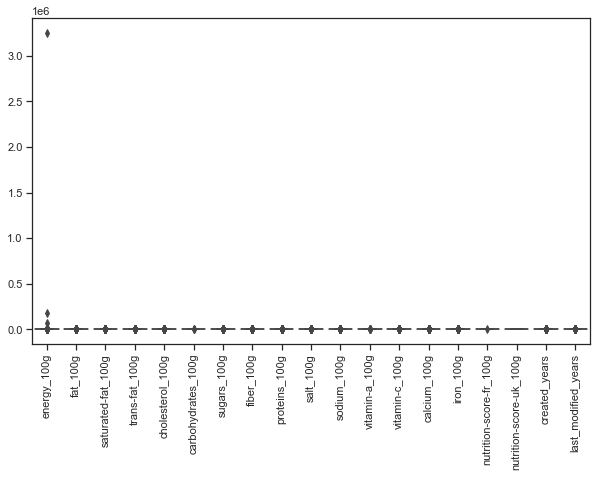

<Figure size 864x576 with 0 Axes>

In [65]:
# Visualisation of outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data = df_continous)
plt.xticks(rotation = 90)
plt.show()
plt.savefig(path + 'data/bxplot_numeric.png', bbox_inches="tight")

In [66]:
# Calculate Q1, Q3 and IQR for each values

Q1 = np.nanpercentile(df_continous, 25, interpolation='midpoint', axis = 0)
Q3 = np.nanpercentile(df_continous, 75, interpolation='midpoint', axis = 0)
IQR = Q3 - Q1

# I prefere to calculated upper bond and lower bond with *3 in order to have extreme outliers
data = [Q1,
        Q3,
        IQR,
        Q3+1.5*IQR,
        Q1-1.5*IQR]

IQR_out = pd.DataFrame(data, columns=continous_cols, index = ['Q1', 'Q3', 'IQR', 'upper_bond', 'lower_bond'])

IQR_out

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,created_years,last_modified_years
Q1,427.0,1.30,0.30,0.000,0.00000,4.0,1.0,0.0,1.8,0.0800,0.031496,0.000060,0.012,0.12000,0.00242,1.0,0.0,2015.0,2016.0
Q3,1649.0,21.00,7.40,0.110,0.00544,53.0,17.8,3.2,11.0,1.2446,0.490000,0.000472,0.030,0.32950,0.00800,15.0,16.0,2016.0,2017.0
IQR,1222.0,19.70,7.10,0.110,0.00544,49.0,16.8,3.2,9.2,1.1646,0.458504,0.000412,0.018,0.20950,0.00558,14.0,16.0,1.0,1.0
upper_bond,3482.0,50.55,18.05,0.275,0.01360,126.5,43.0,8.0,24.8,2.9915,1.177756,0.001091,0.057,0.64375,0.01637,36.0,40.0,2017.5,2018.5
lower_bond,-1406.0,-28.25,-10.35,-0.165,-0.00816,-69.5,-24.2,-4.8,-12.0,-1.6669,-0.656260,-0.000559,-0.015,-0.19425,-0.00595,-20.0,-24.0,2013.5,2014.5


First it's obvious that for fat saturated_fat, carbohydrates, sugars, proteins, fiber and salt the minimum values possible is 0g and the maximum values is 100g. I will not use the IQR to select outliers as it seems not logic with reality. 
Conserning serving quantity and energy_kcal the lower bond is oviously also 0 here, however I can't clearly define a "normal" upper bond. So I will use the upper bond calculated as Q3+1.4*IQR (see above). 

In [67]:
# Drop outliers

cols = ['fat_100g',
      'saturated-fat_100g',
      'carbohydrates_100g',
      'sugars_100g',
      'proteins_100g',
      'salt_100g']

df3_drop = df3.copy()

for col in cols:
    df3_drop.drop(index = df3_drop[(df3_drop.loc[:,col] > 100) | (df3_drop.loc[:,col] < 0)].index, inplace = True)

In [68]:
print(df3.shape)
print(df3_drop.shape)

(98468, 49)
(98456, 49)


In [71]:
# Drop outliers

cols = ['energy_100g']

for col in cols:
    df3_drop.drop(index = df3_drop[(df3_drop.loc[:,col] > IQR_out.loc['upper_bond',col]) | (df3_drop.loc[:,col] < 0)].index, inplace = True)

In [72]:
print(df3_drop.shape)

(97963, 49)


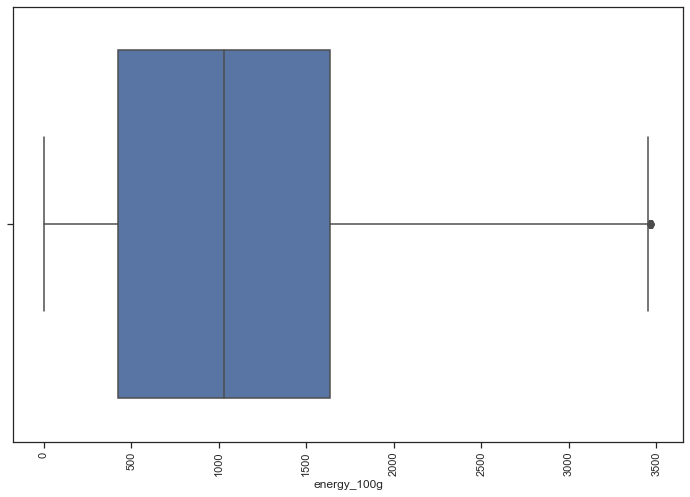

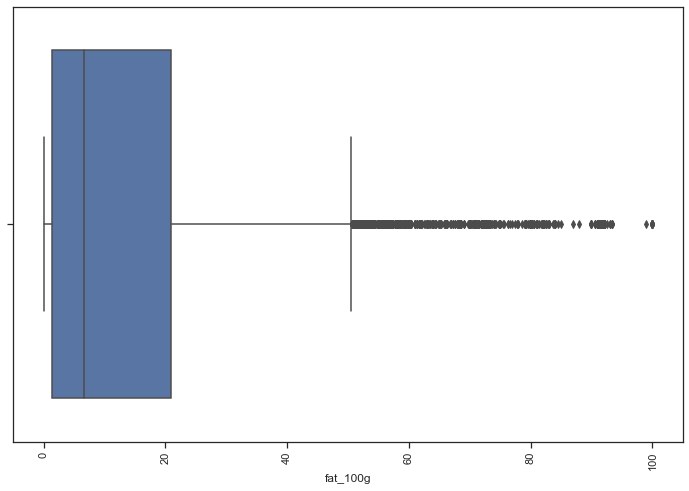

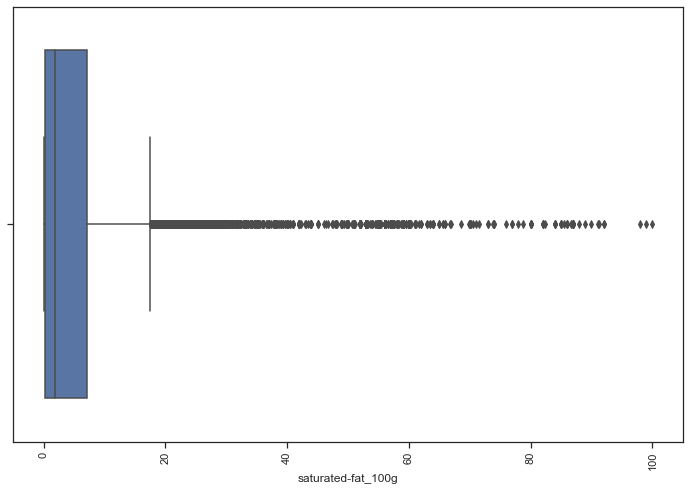

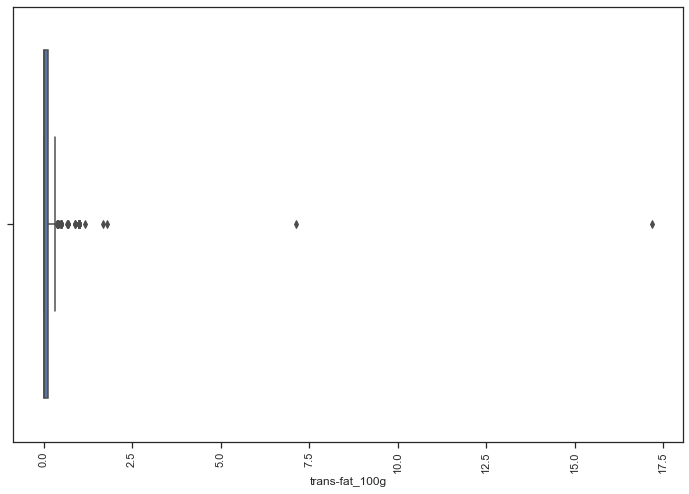

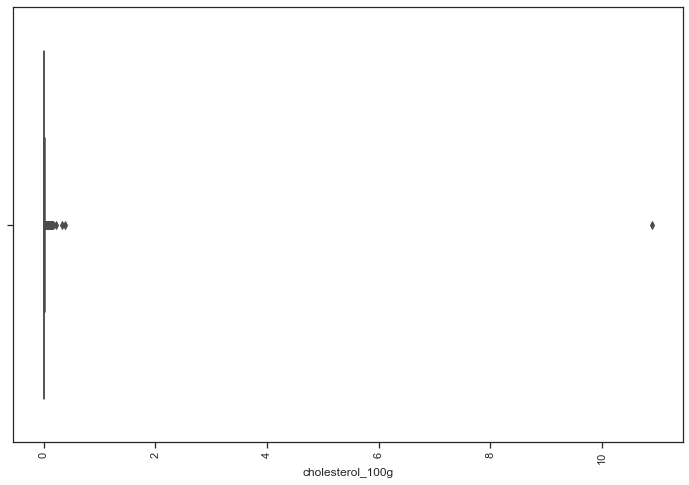

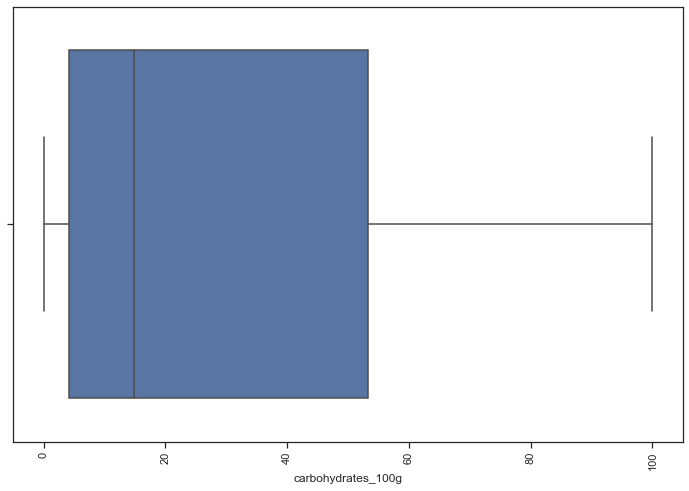

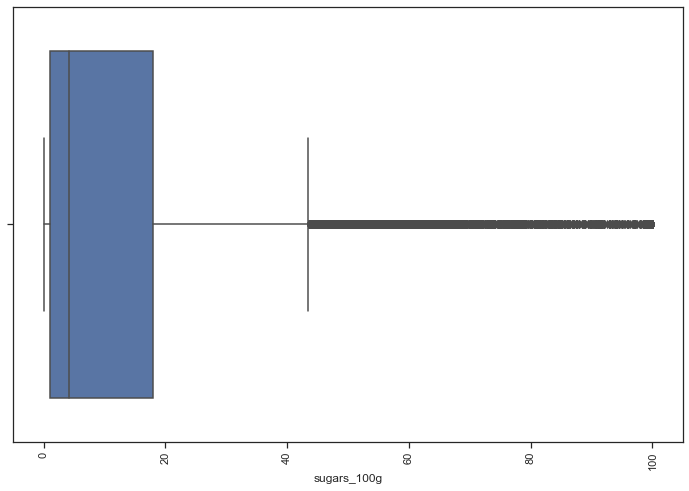

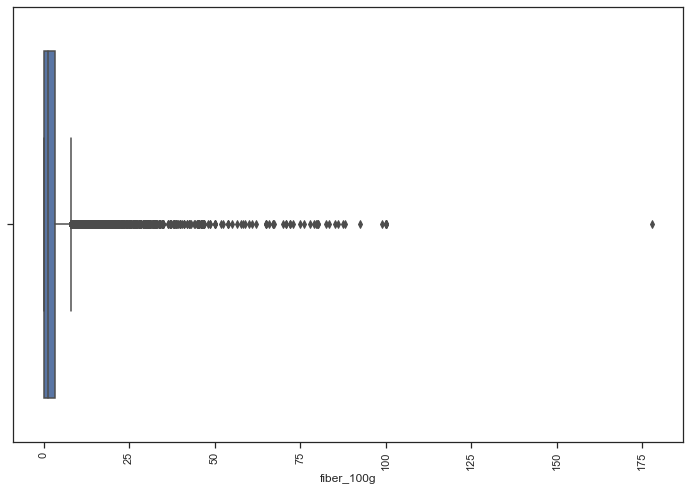

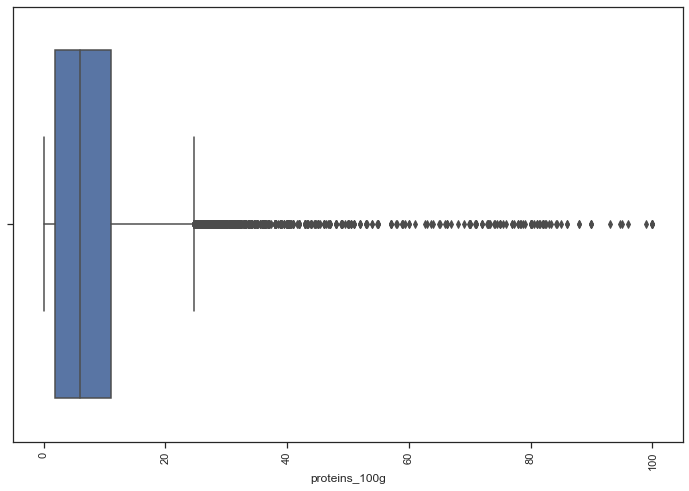

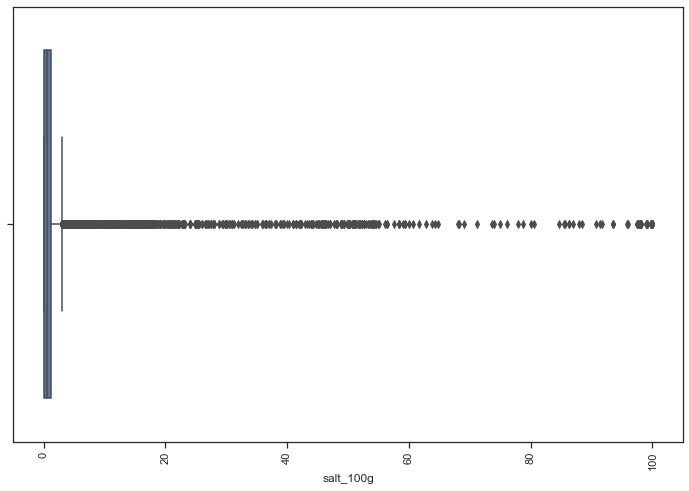

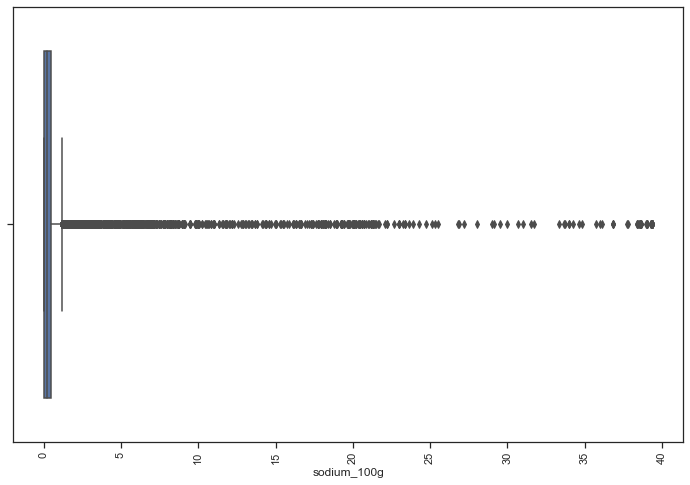

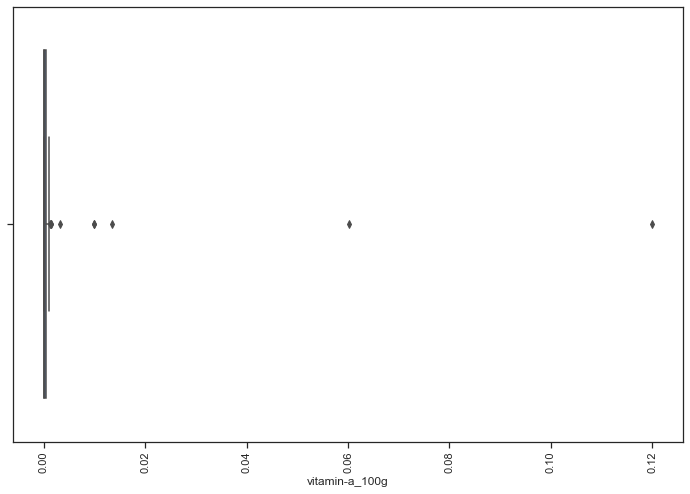

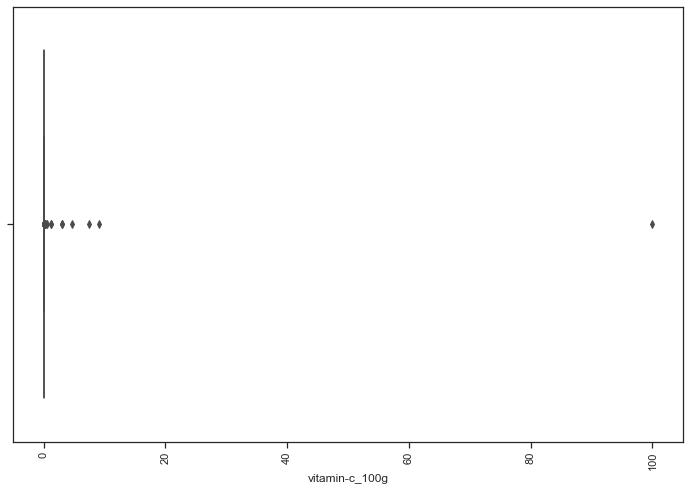

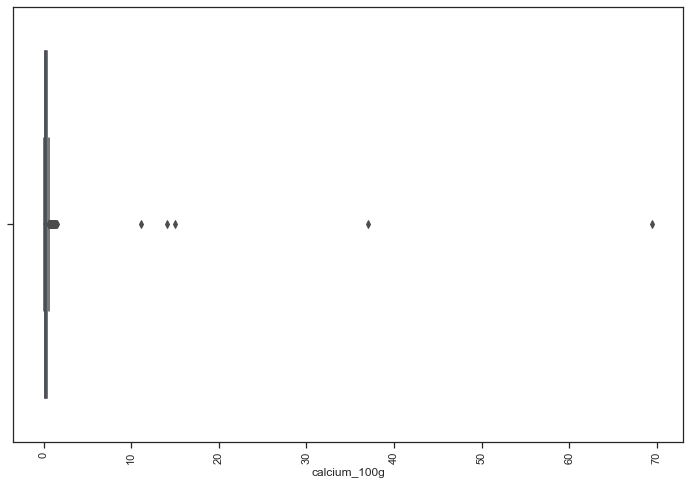

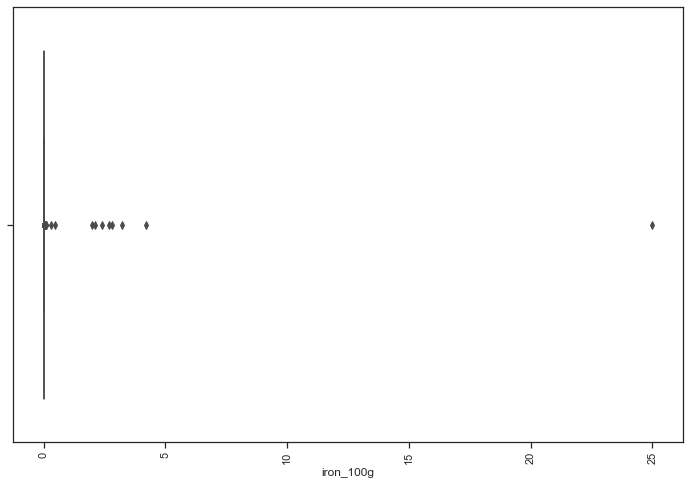

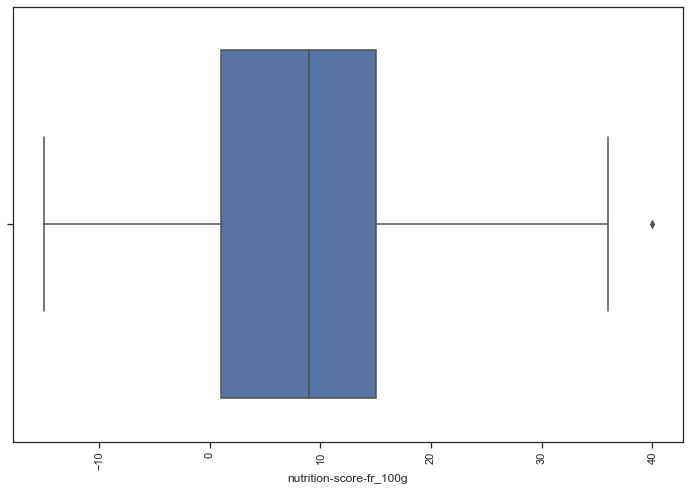

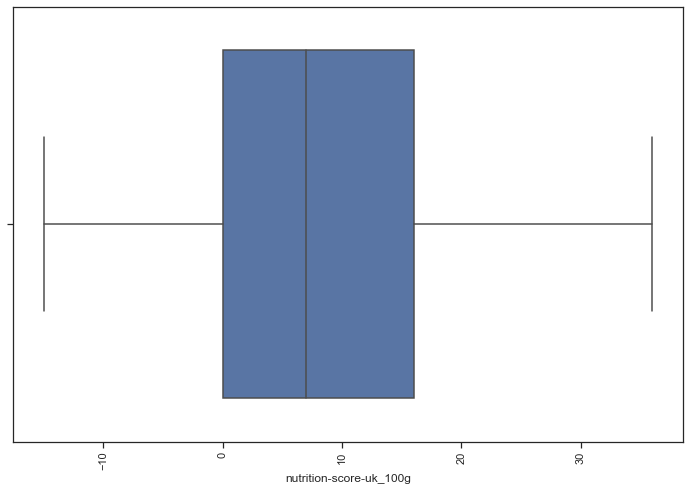

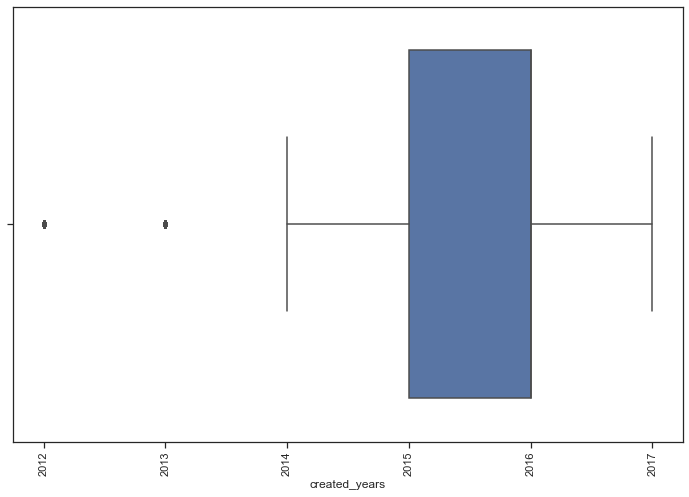

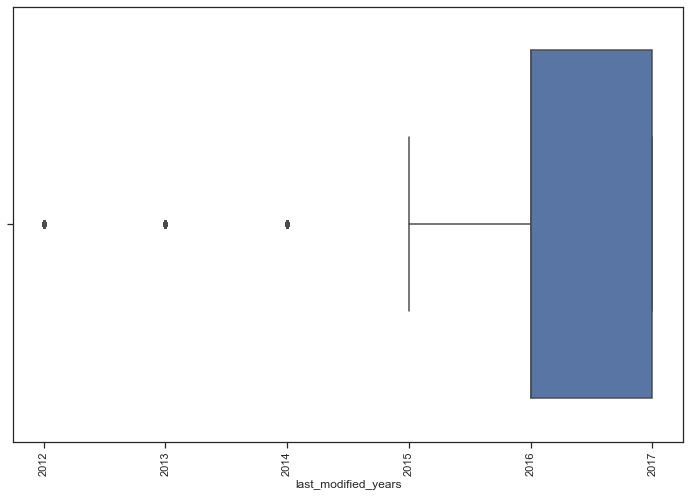

In [73]:
# Visualisation of outliers

for cols in continous_cols: 
    sns.boxplot(data = df3_drop.loc[:,continous_cols], x = cols)
    plt.xticks(rotation = 90)
    plt.show()

## 3.2 Categorical column

In [74]:
df_non_numeric.columns

Index(['code', 'url', 'creator', 'created_t', 'last_modified_t',
       'product_name', 'quantity', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'countries', 'countries_tags',
       'countries_fr', 'ingredients_text', 'serving_size', 'additives_n',
       'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr'],
      dtype='object')

In [75]:
df_non_numeric = df3_drop.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    print(col, ':', len(df3_drop.loc[:,col].unique()))

code : 97963
url : 97963
creator : 2627
created_t : 97533
last_modified_t : 94719
product_name : 74052
quantity : 9610
brands : 20949
brands_tags : 16152
categories : 26574
categories_tags : 15607
categories_fr : 15607
countries : 661
countries_tags : 325
countries_fr : 324
ingredients_text : 48951
additives_n : 27
additives : 45446
additives_tags : 11540
additives_fr : 11540
ingredients_from_palm_oil_n : 4
ingredients_that_may_be_from_palm_oil_n : 7
nutrition_grade_fr : 6
pnns_groups_1 : 14
pnns_groups_2 : 42
states : 817
states_tags : 817
states_fr : 817
main_category : 1613
main_category_fr : 1613


In [76]:
# Transfome ingredients from palm oil_n and ingredients that may be from palm oil_n in one category
df3_drop.loc[df3_drop['ingredients_from_palm_oil_n'].notnull(),'ingredients_from_palm_oil_n'] = df3_drop.loc[df3_drop['ingredients_from_palm_oil_n'].notnull(),['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']].astype('int').sum(axis = 1).astype('object')

df3_drop.drop('ingredients_that_may_be_from_palm_oil_n', inplace=True, axis = 1)

In [77]:
df3_drop.shape

(97963, 48)

In [78]:
# add non_numeric cols to discrete 
categorical_cols = ['additives_n',
                   'ingredients_from_palm_oil_n',
                   'nutriscore_score',
                   'nutriscore_grade',
                   'nova_group',
                   'pnns_groups_1',
                   'pnns_groups_2',
                   'created_years',
                   'last_modified_years']

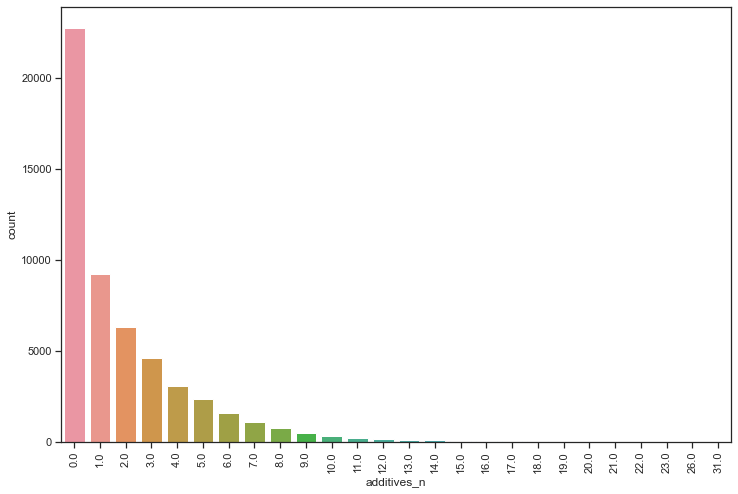

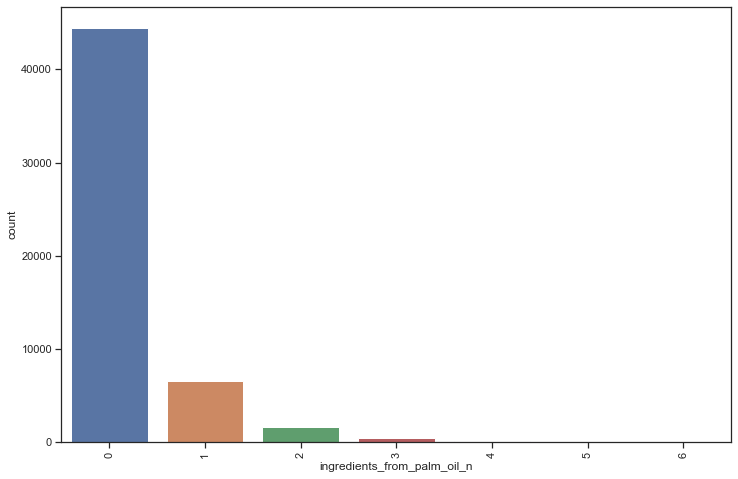

ValueError: Could not interpret input 'nutriscore_score'

In [79]:
# Plot a bar chart to spot any defect values
for cols in categorical_cols:
    sns.countplot(data = df3_drop, x = cols)
    plt.xticks(rotation = 90)
    plt.show()

In [60]:
# modification of the mispleling category in PMMS1 ad PMMS2

df3_drop.loc[df3_drop['pnns_groups_1'] == 'sugary-snacks', 'pnns_groups_1'] = 'Sugary snacks'

df3_drop.loc[:, 'pnns_groups_1'].value_counts()

unknown                    490450
Sugary snacks               72076
Fish Meat Eggs              61774
Milk and dairy products     41068
Cereals and potatoes        32277
Composite foods             29283
Beverages                   28295
Fruits and vegetables       27353
Fat and sauces              22250
Salty snacks                21756
Alcoholic beverages         11784
Name: pnns_groups_1, dtype: int64

In [80]:
df3_drop.loc[df3_drop['pnns_groups_2'] == 'pastries', 'pnns_groups_2'] = 'Pastries'
df3_drop.loc[df3_drop['pnns_groups_2'] == 'Pizza pies and quiche', 'pnns_groups_2'] = 'Pizza pies and quiches'

df3_drop.loc[:, 'pnns_groups_2'].value_counts()

unknown                             12468
One-dish meals                       4948
Biscuits and cakes                   3762
Sweets                               3427
Cereals                              3046
Cheese                               3027
Processed meat                       2907
Non-sugared beverages                2882
Dressings and sauces                 2609
Chocolate products                   2216
Fish and seafood                     2184
Alcoholic beverages                  2093
Milk and yogurt                      2061
Vegetables                           1773
Sweetened beverages                  1659
Appetizers                           1627
Fruit juices                         1532
Fruits                               1501
Meat                                 1357
Bread                                1315
Breakfast cereals                    1113
Fats                                  898
Dairy desserts                        746
Sandwich                          

## 4. Finalisation 

Now that we clean the dataset we need to take care of remaining missing values. To do so we decide to create differentes final dataset and to compare analysis results. 

- drop all NaN values
- imputation of NaN values 

In [81]:
#Let's have a look at the actual dataset 
df4 = df3_drop.copy()

In [82]:
# Change NaN of code, creator, product_name, brands, categories by unknown 
df4_clean = df4.copy()
df4_clean.loc[:, ['code', 'creator', 'product_name', 'brands', 'categories', 'pnns_groups_1', 'pnns_groups_2']] = df4_clean.loc[:, ['code', 'creator', 'product_name', 'brands', 'categories', 'pnns_groups_1', 'pnns_groups_2']].fillna(value = "unknown")

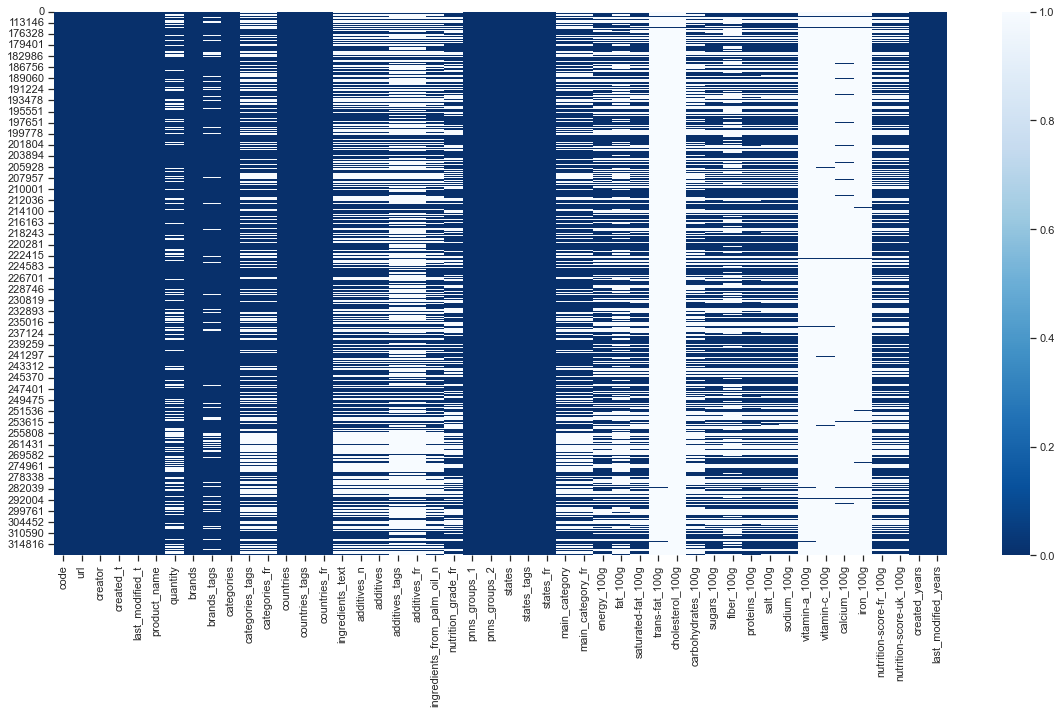

In [83]:
plt.figure(figsize=(20,10))
sns.heatmap(df4_clean.isna(), cmap = 'Blues_r')
plt.savefig(path + 'visualisation/NaN_heatmap_final.png', bbox_inches="tight")

In [84]:
print(df4_clean.shape)
df4_clean.to_csv(path + 'data/clean_dataset_NaN.csv', index = False)

(97963, 48)


### 4.1 Drop NaN values

In [85]:
df4_clean_drop = df4_clean.dropna()
df4_clean_drop.to_csv(path +'data/clean_dataset_NaNremoved.csv', index = False)

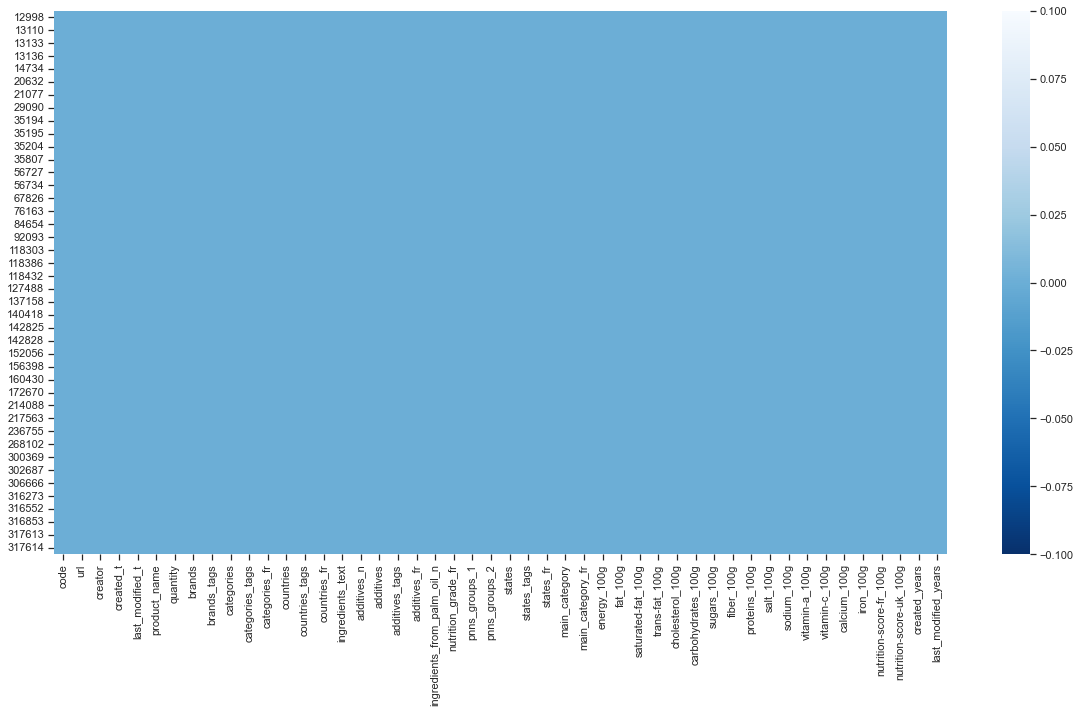

(42, 48)


In [86]:
plt.figure(figsize=(20,10))
sns.heatmap(df4_clean_drop.isna(), cmap = 'Blues_r')
plt.show()
print(df4_clean_drop.shape)

### 4.2 Impute NaN values

#### 4.2.1 Imputation by mean and median
Here we are going to impute continious variable using mean and discrete variable using median. However to be more precise we are going to take the value of grouped data by pnns group 2

In [87]:
df5 = df4_clean.copy()

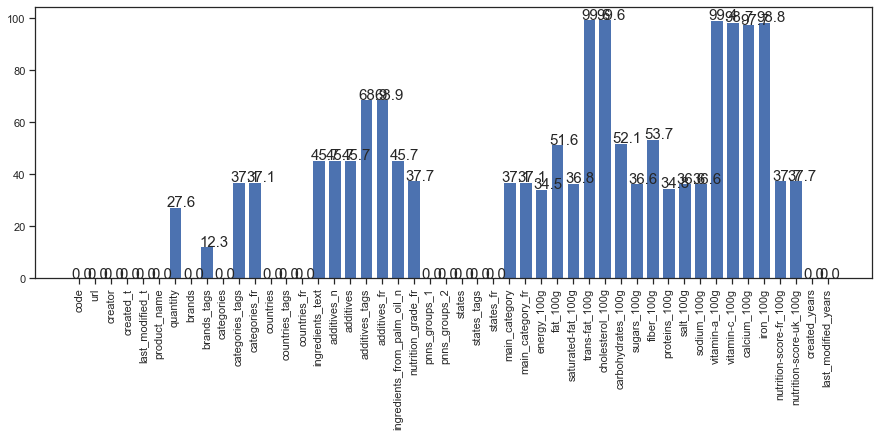

In [88]:
# Shows percentage of missing values per column
plt.figure(figsize = (15,5))
plt.bar(x = (df5.columns).astype('str'), height = df5.isnull().mean() * 100)
plt.xticks(rotation = 90)
for i, v in enumerate(df5.isnull().mean() * 100):
    plt.text(i - 0.5, v + 0.1, str(round(v,1)), size = 15)
plt.show()

In [97]:
# Using mean to impute the missing values for continous data

missing_col_continous = ['energy_100g',
                        'fat_100g',
                        'saturated-fat_100g',
                        'carbohydrates_100g',
                        'sugars_100g', 
                        'proteins_100g',
                        'salt_100g',
                        'nutrition-score-fr_100g']
df5_clean = df5
for col in missing_col_continous:
    df5_clean[col] = df5_clean[col].fillna(round(df5_clean.groupby('pnns_groups_2')[col].transform('mean'),2))

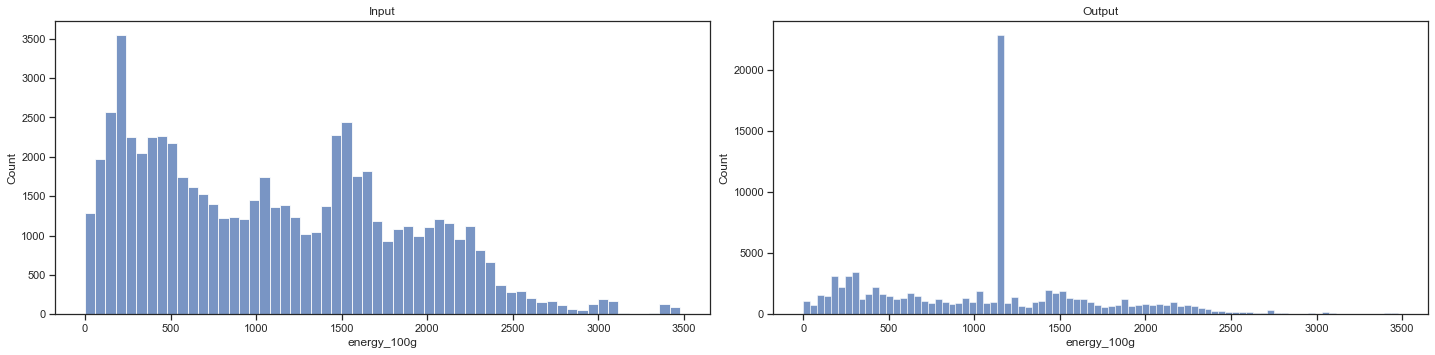

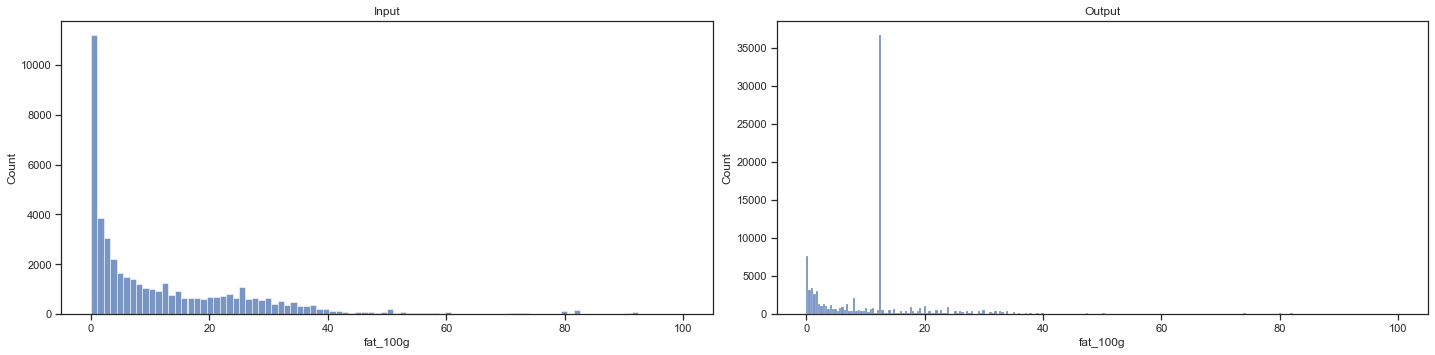

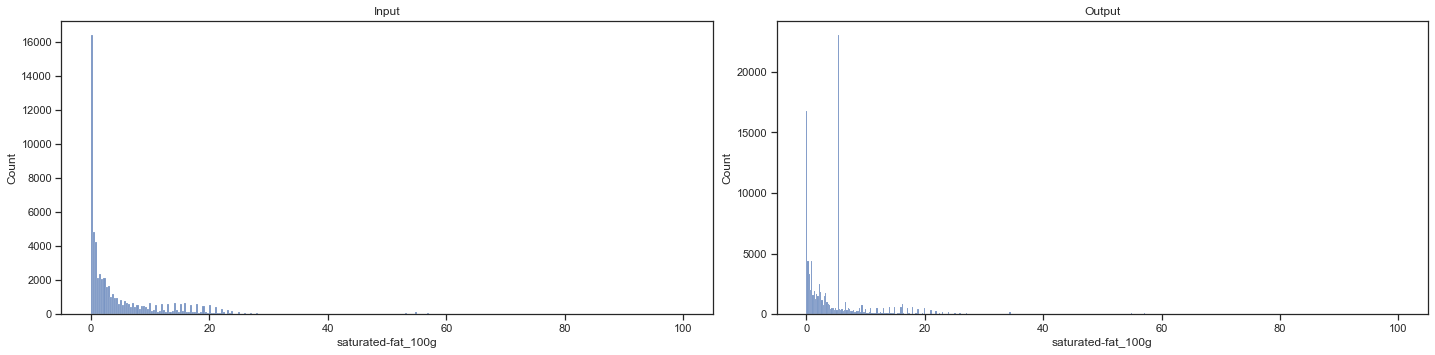

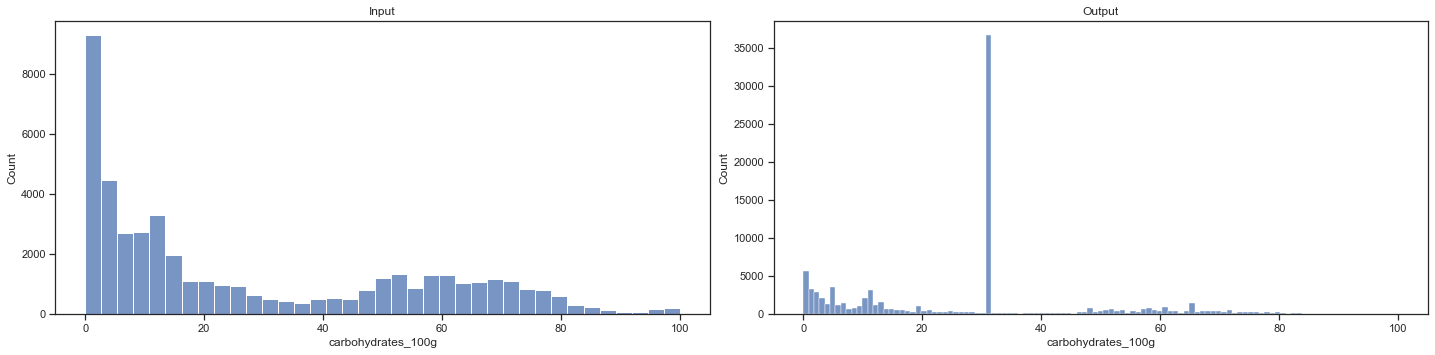

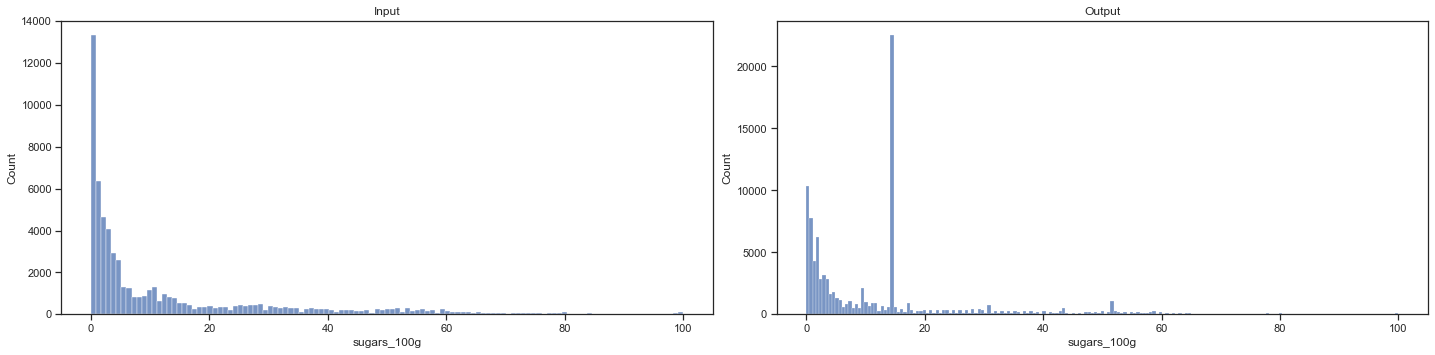

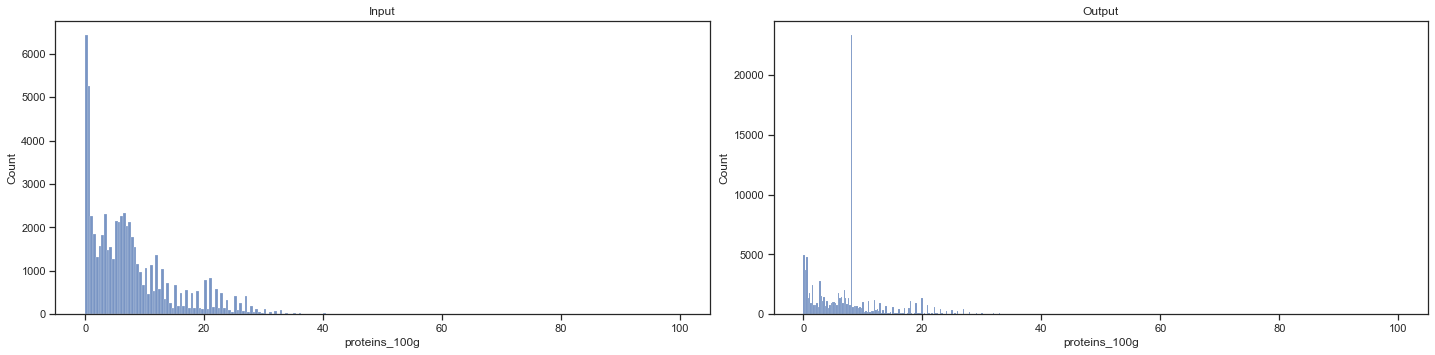

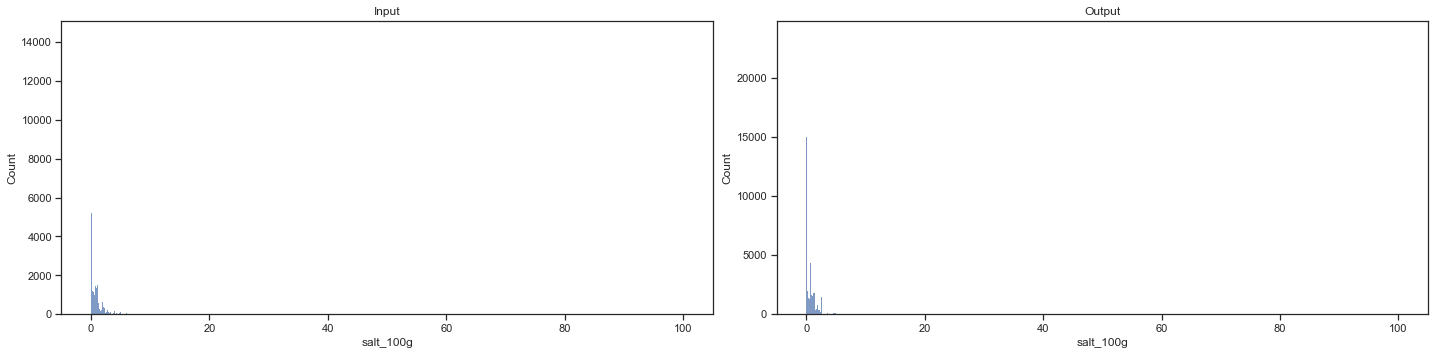

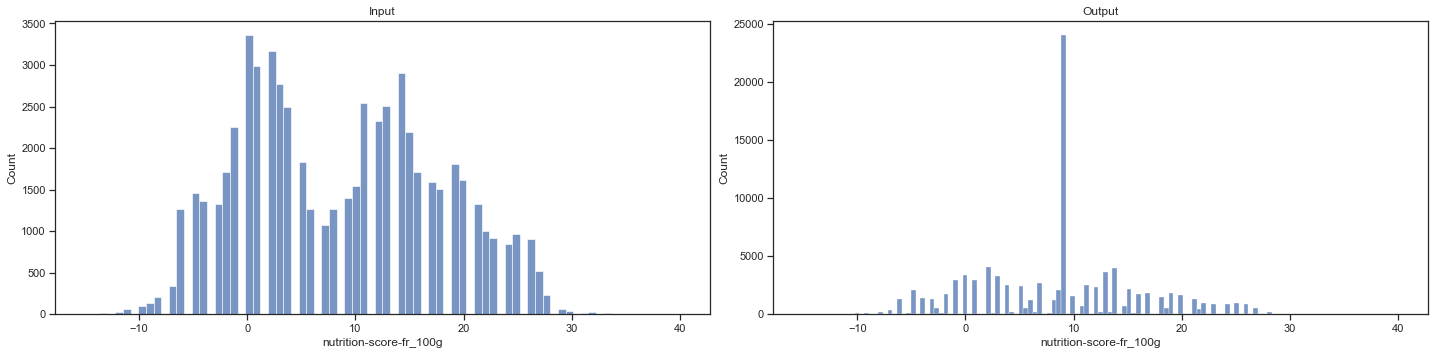

In [98]:
# Visualisation of the imputation effect on data distribution

for col in missing_col_continous:
    fig = plt.figure(figsize = (20, 5))

    plt.subplot(1,2,1)
    sns.histplot(x = df4_clean[col], data = df4)
    plt.title('Input')

    plt.subplot(1,2,2)
    sns.histplot(x = df5_clean[col], data = df5_clean)
    plt.title('Output')

    fig.tight_layout(pad=0.8)
plt.show()

In [ ]:
df5_clean['nutriscore_grade'] = df5_clean['nutriscore_grade'].replace("a", "1")
df5_clean['nutriscore_grade'] = df5_clean['nutriscore_grade'].replace("b", "2")
df5_clean['nutriscore_grade'] = df5_clean['nutriscore_grade'].replace("c", "3")
df5_clean['nutriscore_grade'] = df5_clean['nutriscore_grade'].replace("d", "4")
df5_clean['nutriscore_grade'] = df5_clean['nutriscore_grade'].replace("e", "5")

KeyError: 'nutriscore_grade'

In [74]:
# Using mean to impute the missing values for continous data

missing_col_discrete = ['additives_n',
                        'ingredients_from_palm_oil_n',
                        'nutriscore_grade',
                        'nova_group']

for col in missing_col_discrete:
    df5_clean[col] = df5_clean[col].astype("float")
    df5_clean[col] = df5_clean[col].fillna(round(df5_clean.groupby('pnns_groups_2')[col].transform('median'),2))
    df5_clean[col] = df5_clean[col].astype("int")
    df5_clean[col] = df5_clean[col].astype("object")
    


In [75]:
df5_clean['nutriscore_grade'] = df5_clean['nutriscore_grade'].replace("1", "A")
df5_clean['nutriscore_grade'] = df5_clean['nutriscore_grade'].replace("2", "B")
df5_clean['nutriscore_grade'] = df5_clean['nutriscore_grade'].replace("3", "C")
df5_clean['nutriscore_grade'] = df5_clean['nutriscore_grade'].replace("4", "D")
df5_clean['nutriscore_grade'] = df5_clean['nutriscore_grade'].replace("6", "E")

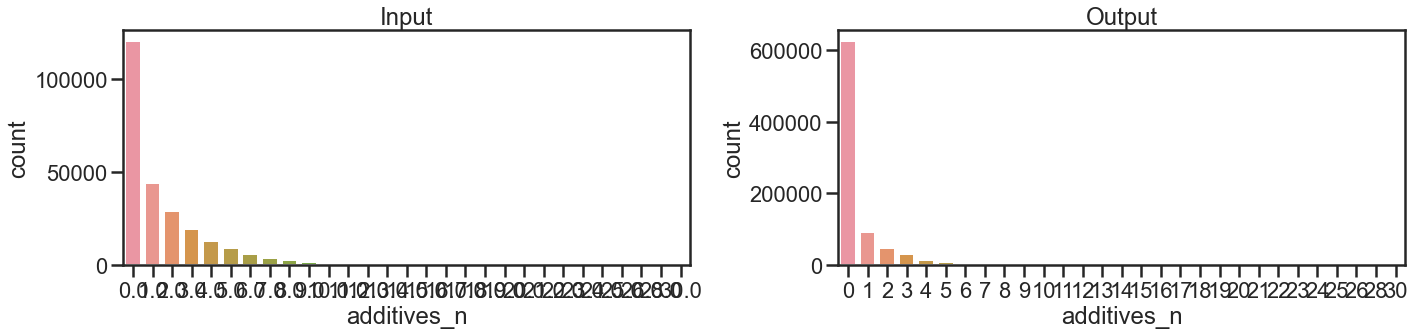

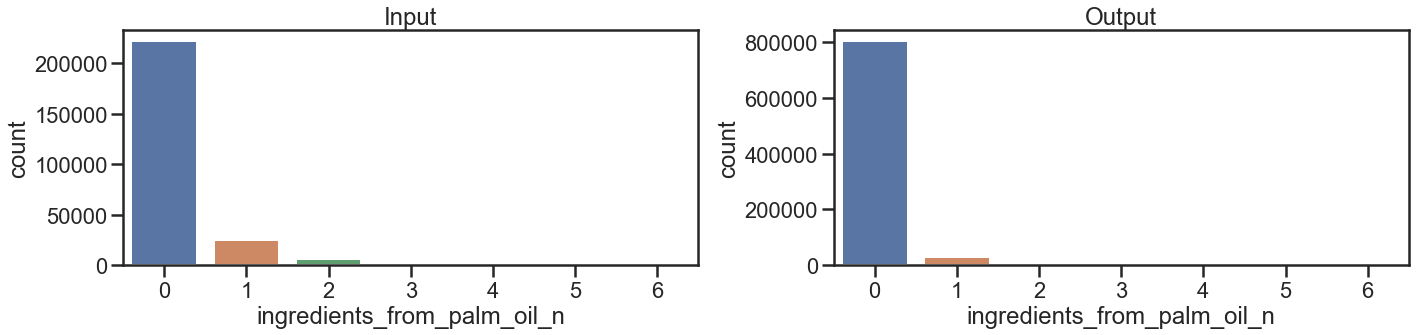

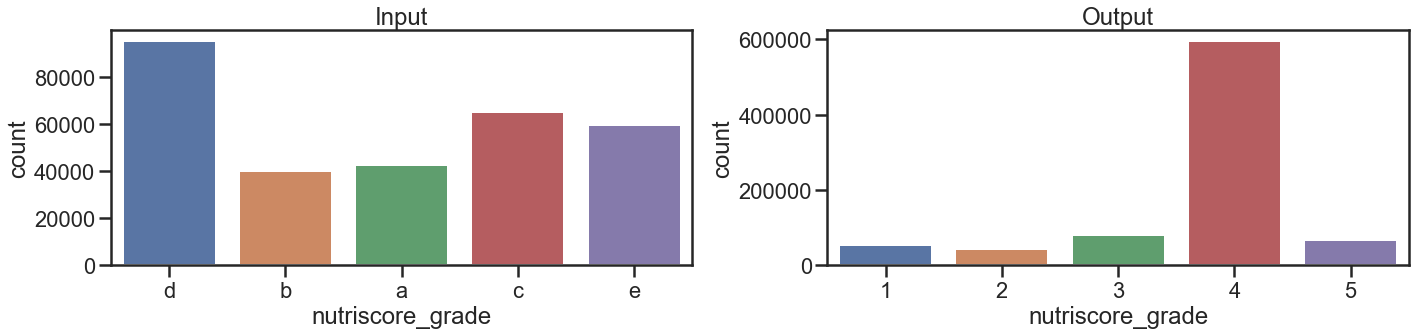

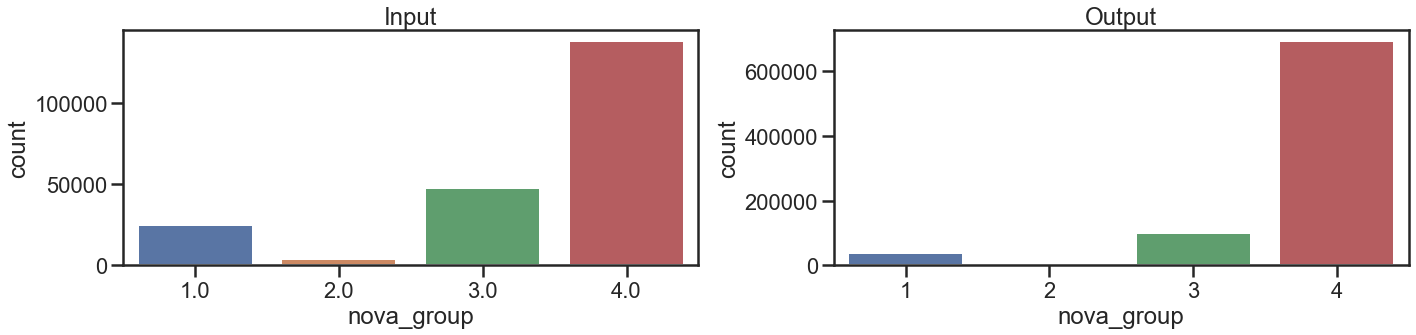

In [76]:
# visualisation of the effect of the imputation on the distribution
for col in missing_col_discrete:
    fig = plt.figure(figsize = (20, 5))

    plt.subplot(1,2,1)
    sns.countplot(x = df4_clean[col], data = df4_clean)
    plt.title('Input')

    plt.subplot(1,2,2)
    sns.countplot(x = df5_clean[col], data = df5_clean)
    plt.title('Output')

    fig.tight_layout(pad=0.8)
plt.show()

In [77]:
# Export imputed dat
print(df5_clean.isnull().sum())
df5_clean.to_csv(path + 'data/clean_dataset_imputed.csv', index = False)

code                           0
creator                        0
product_name                   0
brands                         0
categories                     0
countries                      0
additives_n                    0
ingredients_from_palm_oil_n    0
nutriscore_score               0
nutriscore_grade               0
nova_group                     0
pnns_groups_1                  0
pnns_groups_2                  0
energy-kcal_100g               0
fat_100g                       0
saturated-fat_100g             0
carbohydrates_100g             0
sugars_100g                    0
proteins_100g                  0
salt_100g                      0
created_years                  0
last_modified_years            0
dtype: int64


In [78]:
#Drop Na for continous variable <- this dataset is the one I will use for the analysis

df4_clean = df4_clean.dropna(subset=['energy-kcal_100g',
            'fat_100g',
            'saturated-fat_100g',
            'carbohydrates_100g',
            'sugars_100g', 
            'proteins_100g',
            'salt_100g'], axis = 0)
df4_clean.to_csv(path + 'data/clean_dataset.csv', index = False)

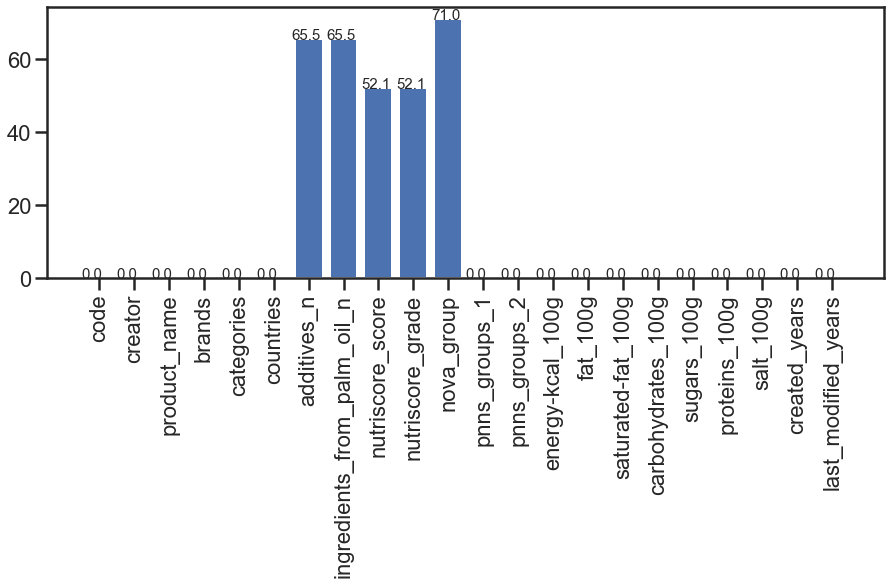

In [79]:
# Shows percentage of missing values per column
plt.figure(figsize = (15,5))
plt.bar(x = (df4_clean.columns).astype('str'), height = df4_clean.isnull().mean() * 100)
plt.xticks(rotation = 90)
for i, v in enumerate(df4_clean.isnull().mean() * 100):
    plt.text(i - 0.5, v + 0.1, str(round(v,1)), size = 15)
plt.show()

### 4.2.2 KNN impute

4.2.2.1 Imputation of nova_group with KNN

I first wanted to do KNN imputation but I figured out that I will be good to know more about the data an the link between any variables before doing any model fitting and prediction (eventually PCA). So I decided to stop this part and to do it after analysis in the exploration notebook 

In [ ]:
#instantiate both packages to use
#encoder = OrdinalEncoder()
#imputer = KNNImputer(n_neighbors=10)
# create a list of categorical columns to iterate over
#df_non_numeric = df4_KNN.select_dtypes(exclude=[np.number])
#cat_cols = df_non_numeric.columns.values

#create a for loop to iterate through each column in the data
#for columns in cat_cols:
    #retains only non-null values
 #   nonulls = np.array(df4_KNN.loc[:,columns].dropna())
    #reshapes the data for encoding
 #   impute_reshape = nonulls.reshape(-1,1)
    #encode data
  #  impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
   # df4_KNN.loc[df4_KNN[columns].notnull(),columns] = np.squeeze(impute_ordinal)

In [ ]:
# impute data and convert 
#encode_data = pd.DataFrame(np.round(imputer.fit_transform(df4_KNN)),columns = df4_KNN.columns)

In [ ]:
#create a for loop to iterate through each column in the data to reverse encoding
#for columns in cat_cols:
    #retains only non-null values
 #   nonulls = np.array(df4_KNN.loc[:,columns].dropna())
    #reshapes the data for encoding
  #  impute_reshape = nonulls.reshape(-1,1)
    #encode data
   # impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    #df4_KNN.loc[df4_KNN[columns].notnull(),columns] = np.squeeze(impute_ordinal)

In [ ]:
#df4_KNN = encoder.inverse_transform(encode_data)

In [ ]:
#np.squeeze(impute_ordinal)

In [ ]:
#impute_ordinal

In [ ]:
#output_ordinal = np.array(df4_KNN.loc[df4_KNN['last_modified_years'].notnull(),'last_modified_years'])

In [ ]:
#output_reshape = output_ordinal.reshape(-1,1)

In [ ]:
#output = encoder.inverse_transform(output_reshape)

In [ ]:
#np.squeeze(output)

In [ ]:
#df4_KNN.loc[:,'last_modified_years'] = np.squeeze(output)

In [ ]:
#df4_KNN.loc[:,'last_modified_years'].isna().mean()